In [1]:
import os
import pandas as pd
import numpy as np
import random
import gc
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

np.random.seed(2019)
random.seed(2019)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 280)
pd.set_option('display.max_colwidth', 150)
data_path = '/data/workspace/kimi/tencent_ads/2020/dataset'

In [2]:
ad_df = pd.read_csv(f'{data_path}/train_preliminary/ad.csv' )
print(ad_df)


         creative_id    ad_id product_id  product_category  advertiser_id industry
0                  1        1         \N                 5            381       78
1                  4        4         \N                 5            108      202
2                  7        7         \N                 5            148      297
3                  8        8         \N                 5            713      213
4                  9        9         \N                 5            695      213
5                 10       10         \N                 5            100       73
6                 12       12         \N                 5            765        6
7                 13       13         \N                 5            113      267
8                 16       16         \N                 5            623        1
9                 20       20      34647                 5            312      267
10                21       21         \N                 5            108      202
11  

326
247    262634
319    178677
6      161962
322    159928
\N     101048
242     77113
238     76788
326     65196
54      64318
73      64130
Name: industry, dtype: int64
null:101048


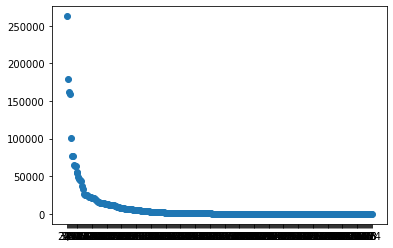

In [3]:
adv_count_value= ad_df['industry'].value_counts()
print(len(adv_count_value))
print(adv_count_value[:10])
null_counts = adv_count_value['\\N']
print(f"null:{null_counts}")
x = adv_count_value.index
y = adv_count_value.values
plt.scatter(x,y)
plt.show()

del adv_count_value

52090
14681    26906
14056    24500
14682    18915
9058     12127
32876     8633
22897     8336
15855     8164
24894     5864
25260     5789
10988     5761
Name: advertiser_id, dtype: int64


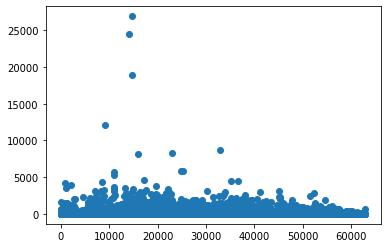

In [5]:
adv_count_value= ad_df['advertiser_id'].value_counts()
print(len(adv_count_value))
print(adv_count_value[:10])
#null_counts = adv_count_value['\\N']
#print(f"null:{null_counts}")
x = adv_count_value.index
y = adv_count_value.values
plt.scatter(x,y)
plt.show()

del adv_count_value

In [6]:
adid_df = ad_df[ad_df['advertiser_id'] == 11]
print(adid_df)

         creative_id    ad_id product_id  product_category  advertiser_id industry
1410            2398     3099         \N                18             11      334
252258        417231   372326         \N                18             11      334
252991        418539   373481         \N                18             11      334
255862        423860   377678         \N                18             11      334
256119        424341   378024         \N                18             11      334
256132        424368   378041         \N                18             11      334
256154        424402   378067         \N                18             11      334
256222        424514   378159         \N                18             11      334
345972        584351   519669         \N                18             11      334
375894        638952   567444         \N                18             11      334
597655       1035469   909537         \N                18             11      334
5978

In [7]:

droped_df = ad_df.drop_duplicates(['advertiser_id','product_id','ad_id'],keep='last')
adv_count_value= droped_df.groupby(['advertiser_id','product_id']).industry.count().reset_index().rename(columns={'industry':"advertiser_ad_id"})
adv_count_value= adv_count_value[adv_count_value['advertiser_ad_id'] > 1]

print(adv_count_value)


# print(len(adv_count_value))
# print(adv_count_value[:10])
# #null_counts = adv_count_value['\\N']
# print(f"null:{null_counts}")
# x = adv_count_value.index
# y = adv_count_value.values
# plt.scatter(x,y)
# plt.show()

# del adv_count_value

       advertiser_id product_id  advertiser_ad_id
0                  2         \N                11
1                  3         \N                30
2                  4         \N                 2
3                  5       8523                 2
4                  6         \N                19
5                  7         \N                12
6                  8         \N                69
7                  9         \N                 2
8                 10         \N                 8
9                 11       1398                18
10                11         \N                13
12                13         \N                 2
13                14         \N                74
14                15         \N                68
18                17         \N                 2
19                18         \N                11
20                19         \N                 2
21                20       1374                43
22                21         \N                 6


18
2     923994
18    663346
3     283817
8     233832
5     227970
13     38072
17     35638
4      22917
12     19592
6      12077
7       7611
16      7216
9       2970
11      1379
15       332
1        259
14        95
10        18
Name: product_category, dtype: int64
null:101048


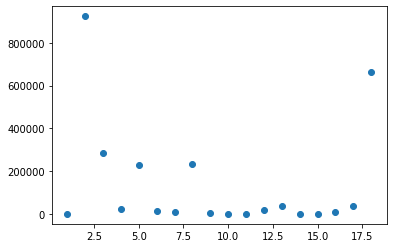

In [8]:
adv_count_value= ad_df['product_category'].value_counts()
print(len(adv_count_value))
print(adv_count_value[:20])
#null_counts = adv_count_value['\\N']
print(f"null:{null_counts}")
x = adv_count_value.index
y = adv_count_value.values
plt.scatter(x,y)
plt.show()

del adv_count_value

In [9]:
adv_count_value= ad_df['product_id'].value_counts()
print(len(adv_count_value))
print(adv_count_value[:10])
null_counts = adv_count_value['\\N']
print(f"null:{null_counts}")
#x = adv_count_value.index
#y = adv_count_value.values
#plt.scatter(x,y)
#plt.show()

del adv_count_value

33273
\N      929524
23       37705
1766     33103
1674     32395
1064     30665
136      29479
1810     25195
111      23236
1261     21242
1334     21185
Name: product_id, dtype: int64
null:929524


In [10]:
adv_count_value= ad_df['ad_id'].value_counts()
print(len(adv_count_value))
print(adv_count_value[:10])
#null_counts = adv_count_value['\\N']
#print(f"null:{null_counts}")
# x = adv_count_value.index
# y = adv_count_value.values
# plt.scatter(x,y)
# plt.show()

del adv_count_value

2264190
1729961    19
2179954    18
1771929    17
2763747    17
3718339    16
681564     16
847568     16
926023     16
3288857    16
1779604    16
Name: ad_id, dtype: int64


In [13]:
ad_id_count_df = ad_df.groupby(['ad_id']).industry.count().reset_index().rename(columns={'industry':"ad_id_creatives"})
print(ad_id_count_df)
print(ad_id_count_df['ad_id_creatives'].value_counts())


           ad_id  ad_id_creatives
0              1                1
1              4                1
2              7                1
3              8                1
4              9                1
5             10                1
6             12                1
7             13                1
8             16                1
9             20                1
10            21                1
11            22                1
12            23                1
13            24                1
14            27                1
15            28                1
16            29                1
17            36                1
18            39                1
19            41                1
20            44                1
21            46                1
22            48                1
23            49                1
24            50                1
...          ...              ...
2264165  3812162                1
2264166  3812163                1
2264167  38121

In [ ]:
ad_test_df = pd.read_csv(f'{data_path}/test/ad.csv' )
print(ad_test_df)